<a href="https://colab.research.google.com/github/mdzikrim/DeepLearning/blob/main/Modern_CNN_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build Model Modern CNN dengan Tensorflow

In [1]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Memuat dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi nilai pixel
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Membangun model CNN dengan arsitektur modern
model = models.Sequential()

# ----- Block 1 -----
# Layer konvolusi pertama dengan 32 filter, kernel 3x3, dan padding 'same'
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())  # Normalisasi
model.add(layers.Activation('relu'))      # Fungsi aktivasi ReLU

# Layer konvolusi kedua
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))  # Pengurangan dimensi
model.add(layers.Dropout(0.25))                  # Dropout untuk mencegah overfitting

# ----- Block 2 -----
# Layer konvolusi dengan 64 filter
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Layer konvolusi tambahan
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# ----- Fully Connected Layers -----
model.add(layers.Flatten())  # Meratakan fitur untuk input ke Dense layer
model.add(layers.Dense(512)) # Fully connected layer dengan 512 neuron
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))  # Dropout lebih tinggi untuk mencegah overfitting
model.add(layers.Dense(10, activation='softmax'))  # Output layer dengan 10 neuron (satu untuk tiap kelas)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Menyusun dan mengkompilasi model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
# Melatih model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=25,
                    validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4148 - loss: 1.7436 - val_accuracy: 0.4585 - val_loss: 1.5758
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6349 - loss: 1.0283 - val_accuracy: 0.5940 - val_loss: 1.1382
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6941 - loss: 0.8619 - val_accuracy: 0.6633 - val_loss: 0.9726
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7356 - loss: 0.7442 - val_accuracy: 0.6721 - val_loss: 0.9476
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7561 - loss: 0.6890 - val_accuracy: 0.7263 - val_loss: 0.7909
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7782 - loss: 0.6265 - val_accuracy: 0.7784 - val_loss: 0.6302
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8012 - loss: 0.5651 - val_accuracy: 0.7060 - val_loss: 0.8952
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8143 - loss: 0.5275 - val_accuracy

In [6]:
# Mengevaluasi model pada data test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8129 - loss: 0.6438
Test loss: 0.6362562775611877
Test accuracy: 0.8151999711990356


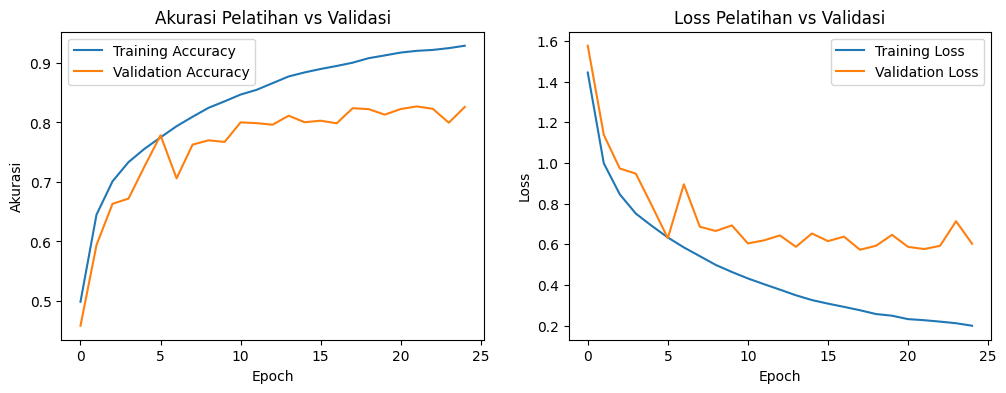

In [7]:
# Visualisasi hasil pelatihan: akurasi dan loss
plt.figure(figsize=(12,4))

# Grafik Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Build Model Modern CNN dengan PyTorch

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [9]:
# Transformasi: konversi ke tensor dan normalisasi
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),  # mean per channel (R, G, B)
                         (0.2023, 0.1994, 0.2010))  # std per channel (R, G, B)
])

# Memuat dataset CIFAR-10 untuk training
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True
)

# Memuat dataset CIFAR-10 untuk testing
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=64, shuffle=False
)

100%|██████████| 170M/170M [00:05<00:00, 31.2MB/s]


In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # ----- Block 1 -----
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(32)

        # ----- Block 2 -----
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(64)

        # ----- Fully Connected -----
        self.fc1   = nn.Linear(64 * 8 * 8, 512)
        self.bn5   = nn.BatchNorm1d(512)
        self.fc2   = nn.Linear(512, 10)

        self.relu  = nn.ReLU()
        self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)
        self.dropout_fc = nn.Dropout(0.5)

    def forward(self, x):
        # Block 1
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)

        # Block 2
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout(x)

        # Fully Connected
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.bn5(self.fc1(x)))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x

# Inisialisasi model dan pindahkan ke device (CPU/GPU)
model = Net().to(device)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)

    # Evaluasi model pada test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/10], Loss: 1.1832, Test Accuracy: 67.85%
Epoch [2/10], Loss: 0.8578, Test Accuracy: 74.67%
Epoch [3/10], Loss: 0.7486, Test Accuracy: 75.83%
Epoch [4/10], Loss: 0.6716, Test Accuracy: 77.22%
Epoch [5/10], Loss: 0.6067, Test Accuracy: 79.31%
Epoch [6/10], Loss: 0.5624, Test Accuracy: 79.63%
Epoch [7/10], Loss: 0.5163, Test Accuracy: 80.95%
Epoch [8/10], Loss: 0.4763, Test Accuracy: 81.39%
Epoch [9/10], Loss: 0.4442, Test Accuracy: 82.26%
Epoch [10/10], Loss: 0.4084, Test Accuracy: 82.46%


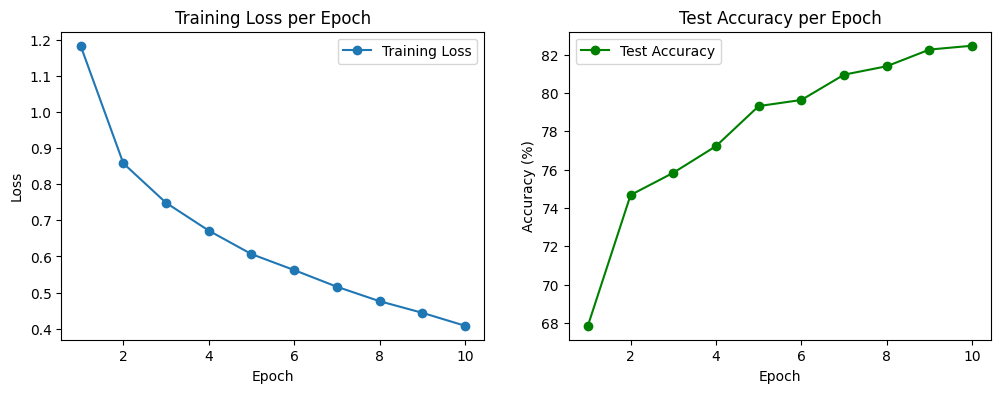

In [13]:
plt.figure(figsize=(12, 4))

# Grafik Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Grafik Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', label='Test Accuracy', color='green')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()